In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.compile(optimizer="adam", loss="categorical_cros")

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 6.1402 - accuracy: 0.3281 - val_loss: 7.8610 - val_accuracy: 0.1552
Epoch 2/10
2/2 [==============================] - 6s 3s/step - loss: 3.4679 - accuracy: 0.4219 - val_loss: 4.3479 - val_accuracy: 0.5172
Epoch 3/10
2/2 [==============================] - 5s 3s/step - loss: 5.1897 - accuracy: 0.3438 - val_loss: 4.4468 - val_accuracy: 0.3276
Epoch 4/10
2/2 [==============================] - 6s 3s/step - loss: 5.2618 - accuracy: 0.3906 - val_loss: 2.8239 - val_accuracy: 0.3276
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 2.3431 - accuracy: 0.3438 - val_loss: 3.4610 - val_accuracy: 0.2931
Epoch 6/10
2/2 [==============================] - 6s 3s/step - loss: 3.0935 - accuracy: 0.5625 - val_loss: 3.9654 - val_accuracy: 0.5172
Epoch 7/10
2/2 [==============================] - 6s 3s/step - loss: 3.2711 - accuracy: 0.4531 - val_l

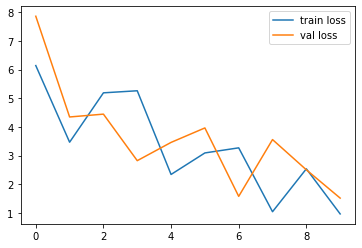

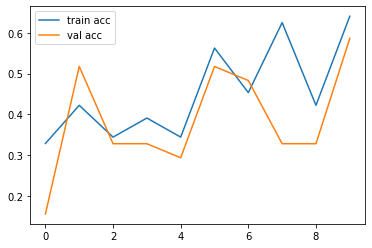

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[1.27778530e-01, 8.64956558e-01, 7.26496056e-03],
       [5.97224459e-02, 9.13210273e-01, 2.70672664e-02],
       [2.00217485e-01, 7.89193511e-01, 1.05889486e-02],
       [2.44139001e-01, 7.45210230e-01, 1.06507316e-02],
       [3.85839731e-01, 6.06150329e-01, 8.00992176e-03],
       [1.78791195e-01, 8.11931133e-01, 9.27770138e-03],
       [4.24561165e-02, 9.50633228e-01, 6.91064959e-03],
       [6.34589374e-01, 3.56571883e-01, 8.83876998e-03],
       [3.43297049e-02, 9.62196410e-01, 3.47390934e-03],
       [2.41648816e-02, 9.75122690e-01, 7.12422654e-04],
       [3.23449463e-01, 6.70550644e-01, 5.99990692e-03],
       [2.17497230e-01, 6.45141542e-01, 1.37361184e-01],
       [5.84799796e-02, 9.39327002e-01, 2.19302718e-03],
       [6.85376823e-01, 3.87528166e-02, 2.75870293e-01],
       [3.42902958e-01, 6.51723742e-01, 5.37329959e-03],
       [1.13831192e-01, 8.75035107e-01, 1.11336531e-02],
       [8.69564340e-02, 9.12293017e-01, 7.50579871e-04],
       [7.62762010e-01, 2.35336

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [23]:
img=image.load_img('Datasets/Test/lamborghini/12.jpg',target_size=(224,224))



In [24]:
x=image.img_to_array(img)
x

array([[[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [19., 27., 30.],
        [19., 27., 30.],
        [20., 28., 31.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       ...,

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[11., 15., 18.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [66., 77., 83.],
        [64., 75., 81.],
        [59., 70., 76.]]

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[0.00658545, 0.025856  , 0.96755856]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([False])